In [11]:
import pandas as pd
import numpy as np

sampled_data = pd.read_parquet("sampled_simulations_5th.parquet")

In [12]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GroupKFold, GroupShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# # Add normalized time to the features
def normalize_time_per_simulation(df, simulation_column, time_column):
    df['Normalized_Time'] = df.groupby(simulation_column)[time_column].transform(lambda x: x / x.max())
    return df

# # Apply the function to normalize time
sampled_data = normalize_time_per_simulation(sampled_data, simulation_column='Simulation_ID', time_column='Time (s)')

# Define features and targets
X = sampled_data.drop(columns=['Simulation_ID', 'Time (s)', 
                               '5nm_retentate', '5nm_permeate', '5nm_cumulative_yield', '5nm_size_solute',
                               '40nm_retentate', '40nm_permeate', '40nm_cumulative_yield', '40nm_size_solute',
                               '70nm_retentate', '70nm_permeate', '70nm_cumulative_yield', '70nm_size_solute',
                               '120nm_retentate', '120nm_permeate', '120nm_cumulative_yield', '120nm_size_solute',
                               '190nm_retentate', '190nm_permeate', '190nm_cumulative_yield', '190nm_size_solute',
                               '300nm_retentate', '300nm_permeate', '300nm_cumulative_yield', '300nm_size_solute',
                               '700nm_retentate', '700nm_permeate', '700nm_cumulative_yield', '700nm_size_solute',
                               '2500nm_retentate', '2500nm_permeate', '2500nm_cumulative_yield', '2500nm_size_solute',
                               'Diavolumes', '2500nm_sieving_coefficient', '120nm_sieving_coefficient'])

# Apply log transformation to all features


# # Define target variables
Y = sampled_data[['5nm_retentate', '5nm_permeate',
                  '40nm_retentate', '40nm_permeate', 
                  '70nm_retentate', '70nm_permeate',   
                  '120nm_retentate', '120nm_permeate',  
                  '190nm_retentate', '190nm_permeate', 
                  '300nm_retentate', '300nm_permeate', 
                  '700nm_retentate', '700nm_permeate', 
                  '2500nm_retentate', '2500nm_permeate',
                  'Diavolumes']]
# Ensure X_sqrt and Y_sqrt remain DataFrames
X_sqrt = pd.DataFrame(np.sqrt(X), columns=X.columns, index=X.index)
Y_sqrt = pd.DataFrame(np.sqrt(np.where(Y < 0, 0, Y)), columns=Y.columns, index=Y.index)

# When splitting train/test, this structure will propagate properly


# Apply log transformation to targets

groups = sampled_data['Simulation_ID']

# Define the number of components for PLS
n_components = 5

# Split data into train-validation and test sets
group_split = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_val_idx, test_idx = next(group_split.split(X_sqrt, Y_sqrt, groups))

X_train_val, X_test = X_sqrt.iloc[train_val_idx], X_sqrt.iloc[test_idx]
Y_train_val, Y_test = Y_sqrt.iloc[train_val_idx], Y_sqrt.iloc[test_idx]
groups_train_val = groups.iloc[train_val_idx]

# Initialize scalers
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Set up 5-fold cross-validation
n_folds = 5
group_kfold = GroupKFold(n_splits=n_folds)

# Initialize placeholders for aggregate metrics
validation_q2_list, validation_r2_list = [], []
validation_mae_list, validation_mape_list = [], []
validation_mse_list, validation_rmse_list = [], []

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(group_kfold.split(X_train_val, Y_train_val, groups_train_val), start=1):
    # Split data
    X_train_fold, X_val_fold = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train_val.iloc[train_idx], Y_train_val.iloc[val_idx]

    # Scale data
    X_train_fold_scaled = feature_scaler.fit_transform(X_train_fold)
    Y_train_fold_scaled = target_scaler.fit_transform(Y_train_fold)
    X_val_fold_scaled = feature_scaler.transform(X_val_fold)
    Y_val_fold_scaled = target_scaler.transform(Y_val_fold)

    # Train the model
    pls_model_sqrt_2_add= PLSRegression(n_components=n_components)
    pls_model_sqrt_2_add.fit(X_train_fold_scaled, Y_train_fold_scaled)

    # Predict on validation set
    Y_val_pred = pls_model_sqrt_2_add.predict(X_val_fold_scaled)
    








In [13]:
import numpy as np
from scipy.interpolate import griddata
import pandas as pd
# Load the dataset
data = pd.read_csv('/Users/baochikhuc/Documents/Data_GFP/Processed Data with Selectivity/last_rows_processed.csv')

# Extract columns X, Re, and J_PD
X_train = data['X'].values
Re_train = data['Re'].values
J_PD_train = data['J_PD'].values


|   iter    |  target   |     I     |    Re     |     X     |    pH     |   scale   |
-------------------------------------------------------------------------------------
| 1         | 1.25      | 68.04     | 214.0     | 7.588     | 7.395     | 0.2326    |
| 2         | 1.239     | 28.92     | 14.01     | 8.796     | 7.404     | 0.7019    |
| 3         | 1.257     | 4.685     | 218.3     | 8.492     | 5.849     | 0.2546    |
| 4         | 1.212     | 33.83     | 69.15     | 5.723     | 6.728     | 0.3475    |
| 5         | 1.176     | 110.5     | 32.25     | 3.629     | 6.465     | 0.4877    |
| 6         | 1.189     | 141.5     | 45.73     | 5.628     | 7.37      | 0.1395    |
| 7         | 1.133     | 109.8     | 39.2      | 1.585     | 8.796     | 0.9208    |
| 8         | 1.138     | 145.7     | 69.23     | 1.879     | 7.737     | 0.4741    |
| 9         | 1.11      | 22.84     | 111.9     | 1.309     | 8.637     | 0.32      |
| 10        | 1.206     | 119.6     | 70.82     | 5.68

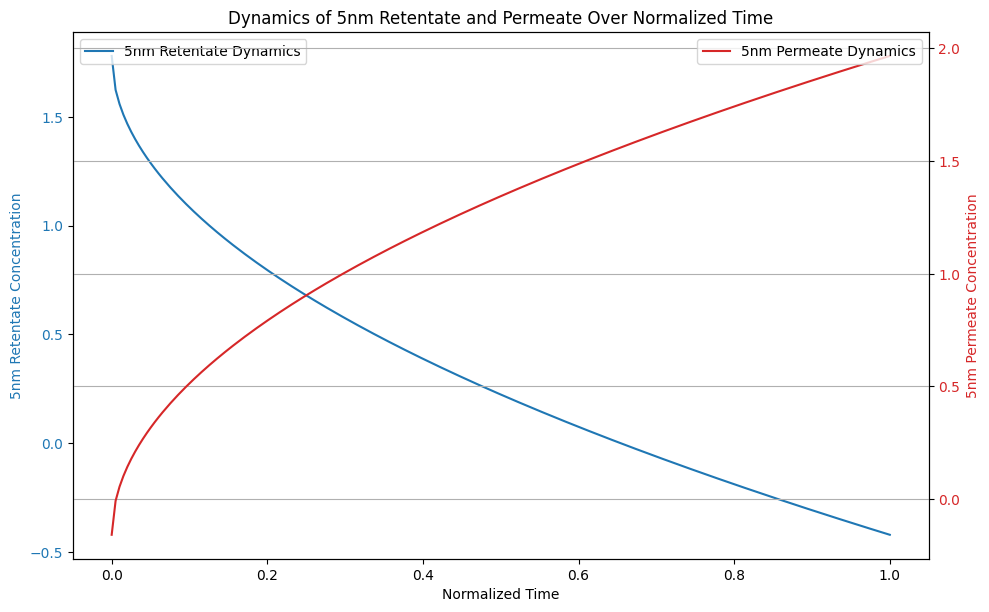

In [30]:
from bayes_opt import BayesianOptimization
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

sieving_columns = [
    '5nm_sieving_coefficient', '40nm_sieving_coefficient', '70nm_sieving_coefficient',
    '190nm_sieving_coefficient', '300nm_sieving_coefficient',
    '700nm_sieving_coefficient'
]

sieving_means = sampled_data[sieving_columns].mean().to_dict()

# Function to predict J_PD
def predict_j_pd(x, re):
    points = np.array([X_train, Re_train]).T
    values = J_PD_train
    result = griddata(points, values, (x, re), method='linear')

    # Ensure result is numeric
    if result is None or np.isnan(result):
        result = 0  # Handle invalid cases
    return float(result)

# Updated predict_dynamics
def predict_dynamics(process_parameters):
    # Set fixed time steps (always 200 steps between 0 and 1)
    time_steps = np.linspace(0, 1, 200)
    
    # Prepare time data and process parameters
    time_data = pd.DataFrame({'Normalized_Time': time_steps})
    parameter_data = pd.DataFrame([process_parameters] * len(time_steps), columns=process_parameters.keys())
    
    # Merge the data and drop duplicate 'Normalized_Time' column
    input_data = pd.concat([time_data, parameter_data.reset_index(drop=True)], axis=1)
    input_data = input_data.loc[:, ~input_data.columns.duplicated()]  # Remove duplicates

    # Ensure the correct feature selection and order
    input_data = input_data[feature_scaler.feature_names_in_]

    # Convert columns to numeric and handle NaNs
    input_data = input_data.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Apply square root transformation and scale the features
    input_data = np.sqrt(input_data)
    input_scaled = feature_scaler.transform(input_data)

    # Predict dynamics
    dynamics = pls_model_sqrt_2_add.predict(input_scaled)
    return dynamics, time_steps

# Objective function without normalized_time
def objective_function_bo(pH, Re, scale, X, I):
    # Predict J_PD from X and Re
    J_PD = predict_j_pd(X, Re)

    # Handle NaN/edge cases (penalize invalid predictions)
    if np.isnan(J_PD) or J_PD <= 0:
        return 0  # Invalid solution

    # Enforce J_actual ≤ J_PD
    J_actual = scale * J_PD

    # Construct process parameters
    process_parameters = {
        'pH': pH,
        'Re': Re,
        'J_actual': J_actual,
        'J_PD': J_PD,
        'X': X,
        'I': I,
        **sieving_means  # Precomputed sieving coefficients
    }

    # Predict dynamics
    dynamics, _ = predict_dynamics(process_parameters)

    # Reverse the transformations (unscale and unsquare)
    dynamics_unscaled = target_scaler.inverse_transform(dynamics)
    dynamics_original = np.square(dynamics_unscaled)

    # Calculate yields
    try:
        initial_5nm = dynamics_original[0, Y.columns.get_loc('5nm_retentate')]
        final_5nm = dynamics_original[-1, Y.columns.get_loc('5nm_retentate')]
        initial_40nm = dynamics_original[0, Y.columns.get_loc('40nm_retentate')]
        final_40nm = dynamics_original[-1, Y.columns.get_loc('40nm_retentate')]

        yield_5nm = 1 - (final_5nm / initial_5nm)
        yield_40nm = 1 - (final_40nm / initial_40nm)
    except ZeroDivisionError:
        return 0  # Penalize invalid concentrations

    # Penalize invalid/negative yields
    if yield_5nm <= 0 or yield_40nm <= 0 or yield_5nm > 1 or yield_40nm > 1:
        return 0

    # Scalarized objective (maximize 5nm, minimize 40nm)
    return yield_5nm / yield_40nm

# Bayesian Optimization setup
pbounds = {
    'pH': (5, 9),
    'Re': (1, 225),      # Reynolds number range
    'scale': (0.1, 0.95),  # Force J_actual < J_PD
    'X': (1, 10),        # Concentration factor
    'I': (1, 180)        # Ionic strength
}

optimizer = BayesianOptimization(
    f=objective_function_bo,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

# Run optimization
optimizer.maximize(init_points=30, n_iter=300)

# Analyze results
best_params = optimizer.max['params']
print(f"Optimal Parameters:\n{best_params}")

# Best solution analysis
best_J_PD = predict_j_pd(best_params['X'], best_params['Re'])
best_J_actual = best_params['scale'] * best_J_PD
print(f"Predicted J_PD: {best_J_PD:.2f}, J_actual: {best_J_actual:.2f}")

# Plot dynamics for verification
best_dynamics, time_steps = predict_dynamics({
    'pH': best_params['pH'],
    'Re': best_params['Re'],
    'J_actual': best_J_actual,
    'J_PD': best_J_PD,
    'X': best_params['X'],
    'I': best_params['I'],
    **sieving_means
})

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Normalized Time')
ax1.set_ylabel('5nm Retentate Concentration', color=color)
ax1.plot(time_steps, best_dynamics[:, Y.columns.get_loc('5nm_retentate')], label='5nm Retentate Dynamics', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('5nm Permeate Concentration', color=color)  # we already handled the x-label with ax1
ax2.plot(time_steps, best_dynamics[:, Y.columns.get_loc('5nm_permeate')], label='5nm Permeate Dynamics', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Dynamics of 5nm Retentate and Permeate Over Normalized Time')
plt.grid(True)
plt.show()


In [31]:
# Reverse the transformations (unscale and unsquare)
best_dynamics = target_scaler.inverse_transform(best_dynamics)
best_dynamics = np.square(best_dynamics)

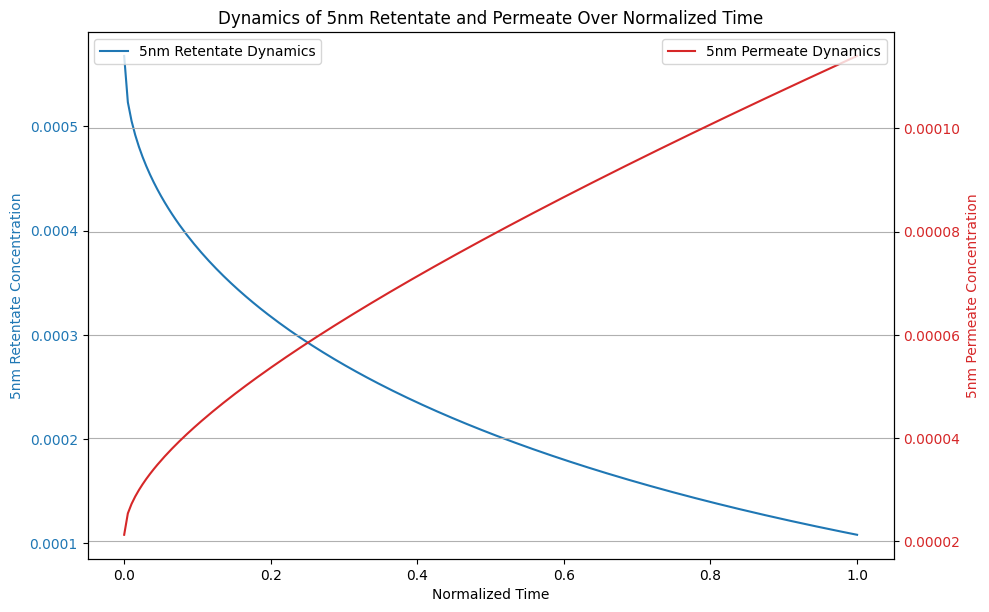

In [32]:
#


fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Normalized Time')
ax1.set_ylabel('5nm Retentate Concentration', color=color)
ax1.plot(time_steps, best_dynamics[:, Y.columns.get_loc('5nm_retentate')], label='5nm Retentate Dynamics', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('5nm Permeate Concentration', color=color)  # we already handled the x-label with ax1
ax2.plot(time_steps, best_dynamics[:, Y.columns.get_loc('5nm_permeate')], label='5nm Permeate Dynamics', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Dynamics of 5nm Retentate and Permeate Over Normalized Time')
plt.grid(True)
plt.show()

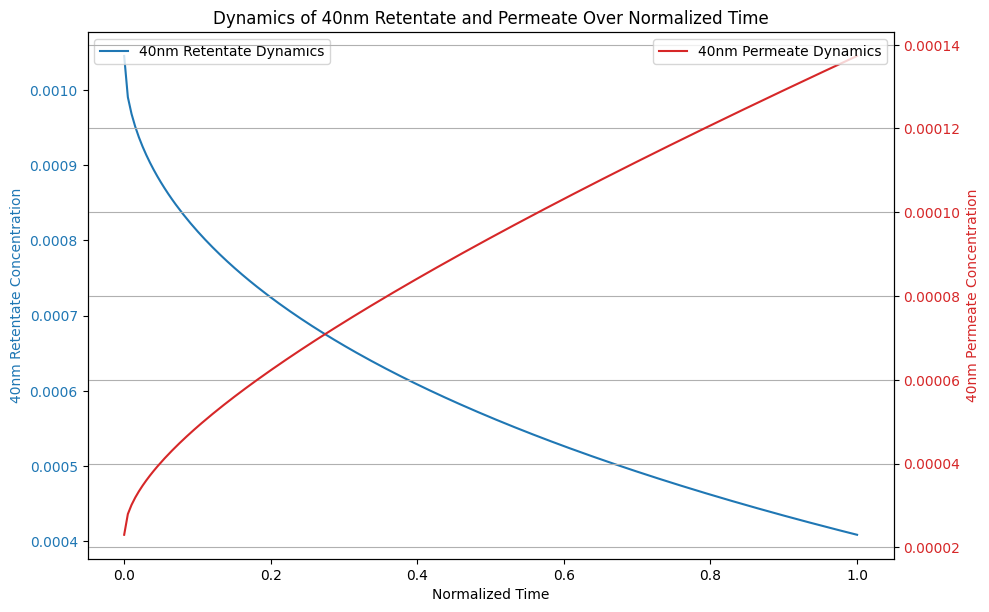

In [33]:


fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Normalized Time')
ax1.set_ylabel('40nm Retentate Concentration', color=color)
ax1.plot(time_steps, best_dynamics[:, Y.columns.get_loc('40nm_retentate')], label='40nm Retentate Dynamics', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('40nm Permeate Concentration', color=color)  # we already handled the x-label with ax1
ax2.plot(time_steps, best_dynamics[:, Y.columns.get_loc('40nm_permeate')], label='40nm Permeate Dynamics', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Dynamics of 40nm Retentate and Permeate Over Normalized Time')
plt.grid(True)
plt.show()